## RSS calculation

In [3]:
# vals = [((0, 0), 1) ,((0, 1), 4), ((1, 0), 3),((1, 1), 7)]

# weights = [0.75, 2.5, 3.5]

# rss_tracker = 0

# for (x1, x2), y in vals:
#     rss_tracker += (y - (weights[0] + weights[1] * x1 + weights[2] * x2)) ** 2

# print(rss_tracker)    

0.25


In [1]:
# run this code cell using shift+enter before moving further.   You will be writing the algorithm from scratch, but these standard packages will make your work cleaner and faster. 

import numpy as np # library which more efficiently allows you to work with large multidimensional arrays and matrices.  It has functions that operate on the arrays/matrices
import pandas as pd # built on numpy.  Makes it easier to read in data and clean data among other things

from sklearn.datasets import fetch_california_housing # We will be using one of SKlearn's datasets

from sklearn.preprocessing import StandardScaler # Scaling is suggested when running a gradient descent algorithm

import matplotlib # a plotting library
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:

def compute_cost(X_1, y, w, N):
    # Write your code in place of ellipsis. Cost can be calculated using a single line of code.
    # Remember w is a vector here.
    print(X_1.shape)
    print(y.shape)
    print(w.shape)
    #     (2, 4)
    # (4, 1)
    # (4, 1)
    cost= 1/(2 * N) * np.sum((np.dot(X_1, w) - y) ** 2)
    return cost

In [3]:

def gradient_descent(X_1 , y, learning_rate, w, n, num_iters):
    # In place of ellipsis, write the updated value of w0 in temp0 and of w1 in temp1
    # Finish the gradient descent function
    
    history = []
    for i in range(num_iters):
        # derivative vector is given by : X_train.Transpose *  (( X_train * w)- y ) 
        # You may add your own variables
        temp = w - (learning_rate / n) * np.dot(X_1.T, (np.dot(X_1, w) - y))

        if(i%100==0):
            # In place of ellipsis, call the cost you just coded above            
            cost = compute_cost(X_1, y, w, n)

            # ! You can uncomment print statements below to see how cost changes, 
            # ! but please make sure you put prints in comments before submission
            # print("Cost")
            # print(cost)
        w = temp
        
        print(f"On iteration {i+1}, w0 and w1 are: {w}")
        print("\n")
        
        history.append(w)
        
    w0_values = [h[0] for h in history]
    w1_values = [h[1] for h in history]
    plt.scatter(w0_values, w1_values)

    # Add labels and title
    plt.xlabel('w0')
    plt.ylabel('w1')
    plt.title(f'Gradient Descent Path for alpha = {learning_rate}')
        
            
    return w

In [4]:

# Complete the function
def multiple_linear_reg_model_gda(X_1 , y, n , learning_rate , num_iters):

    #initialize the values of parameter vector w. It should be a column vector of zeros of dimension(d+1,1)
    w = np.zeros((n, 1)) # * n features

    #calculate the initial cost by calling the function you coded above.
    initial_cost= compute_cost(X_1, y, w, n)
    print("Initial Cost")
    print(initial_cost)

    #calculate the optimized value of gradients by calling the gradient_descent function coded above 
    w = gradient_descent(X_1 , y, learning_rate, w, n, num_iters)
    
    # Calculate the cost with the optimized value of w0 and w1 by calling the cost function.    
    final_cost = compute_cost(X_1, y, w, n)
    print("Final Cost")
    print(final_cost)
    
    return w, initial_cost, final_cost

In [5]:

def predict(x, w_opt):
    x_aug = np.append(x, 1)
    # print(x_aug)
    
    predicted_y = np.dot(x_aug, w_opt)
    
    return predicted_y


In [6]:
# Write the code below
def get_stats(X_1, y_2d, w_vec):
    y_tr_pred = np.dot(X_1, w_vec)
    RSS = np.sum((y_tr_pred - y_2d) ** 2)
    TSS = np.sum((y_2d - np.mean(y_2d)) ** 2)
    R2 = 1 - RSS / TSS
    print("RSS = {0:f}".format(RSS))
    print("TSS = {0:f}".format(TSS))
    print("R^2 = {0:f}".format(R2))

### Q5

In [12]:
# make a 4, 2 array with features (0, 0), (0, 1), (1, 0), (1, 1)
X_1 = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
X_1 = X_1.T
# our shape of X_1 = (2, 4)

# print(X_1)

y_2d = np.array([[1], [4], [3], [7]])
# our shape of y_2d = (4, 1)


# print(y_2d)
N = 4
num_iters = 10
learning_rate = 0.06
results = multiple_linear_reg_model_gda(X_1, y_2d, N, learning_rate, num_iters)

w = results[0]

print(f"Q5")
print("w: ", w, "\ninitial cost: ", results[1], "\nfinal cost: ", results[2])


(2, 4)
(4, 1)
(4, 1)


ValueError: operands could not be broadcast together with shapes (2,1) (4,1) 

### Q6

In [11]:
# make a 2, 2 array with features (1, 2) and (1, 3)
X_1 = np.array([[1, 2], [1, 3]])

# our shape of X_1 = (2, 2)

# print(X_1)

y_2d = np.array([[4], [3]])
# our shape of y_2d = (2, 1)


# print(y_2d)
N = 2
num_iters = 10


(2, 1)


(2, 2)
(2, 1)
(2, 1)
Initial Cost
6.25
(2, 2)
(2, 1)
(2, 1)
On iteration 1, w0 and w1 are: [[0.21]
 [0.51]]


On iteration 2, w0 and w1 are: [[0.3309]
 [0.7896]]


On iteration 3, w0 and w1 are: [[0.402606]
 [0.942021]]


On iteration 4, w0 and w1 are: [[0.44714649]
 [1.02424191]]


On iteration 5, w0 and w1 are: [[0.47668141]
 [1.06771559]]


On iteration 6, w0 and w1 are: [[0.49792319]
 [1.0898043 ]]


On iteration 7, w0 and w1 are: [[0.51457715]
 [1.10009214]]


On iteration 8, w0 and w1 are: [[0.5286887 ]
 [1.10386963]]


On iteration 9, w0 and w1 are: [[0.54138694]
 [1.10405717]]


On iteration 10, w0 and w1 are: [[0.55329514]
 [1.10226683]]


(2, 2)
(2, 1)
(2, 1)
Final Cost
0.5706884451160339
alpha = 0.06
w:  [[0.55329514]
 [1.10226683]] 
initial cost:  6.25 
final cost:  0.5706884451160339


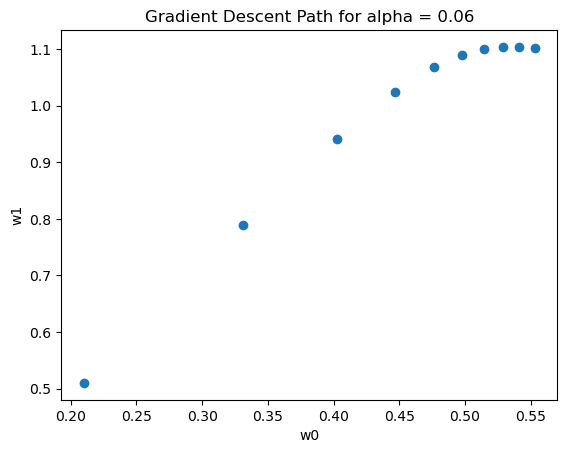

In [8]:
# * 1)
# Call the multiple_linear_reg_model_gda.

print("=========================================")

learning_rate = 0.06
results = multiple_linear_reg_model_gda(X_1, y_2d, N, learning_rate, num_iters)

w = results[0]

print(f"alpha = {learning_rate}")
print("w: ", w, "\ninitial cost: ", results[1], "\nfinal cost: ", results[2])

print("=========================================")



(2, 2)
(2, 1)
(2, 1)
Initial Cost
6.25
(2, 2)
(2, 1)
(2, 1)
On iteration 1, w0 and w1 are: [[0.0035]
 [0.0085]]


On iteration 2, w0 and w1 are: [[0.00697525]
 [0.016936  ]]


On iteration 3, w0 and w1 are: [[0.01042593]
 [0.02530848]]


On iteration 4, w0 and w1 are: [[0.01385224]
 [0.03361791]]


On iteration 5, w0 and w1 are: [[0.01725434]
 [0.04186476]]


On iteration 6, w0 and w1 are: [[0.02063242]
 [0.0500495 ]]


On iteration 7, w0 and w1 are: [[0.02398667]
 [0.0581726 ]]


On iteration 8, w0 and w1 are: [[0.02731725]
 [0.06623451]]


On iteration 9, w0 and w1 are: [[0.03062435]
 [0.0742357 ]]


On iteration 10, w0 and w1 are: [[0.03390813]
 [0.0821766 ]]


(2, 2)
(2, 1)
(2, 1)
Final Cost
5.462308663693527
alpha = 0.001
w:  [[0.03390813]
 [0.0821766 ]] 
initial cost:  6.25 
final cost:  5.462308663693527


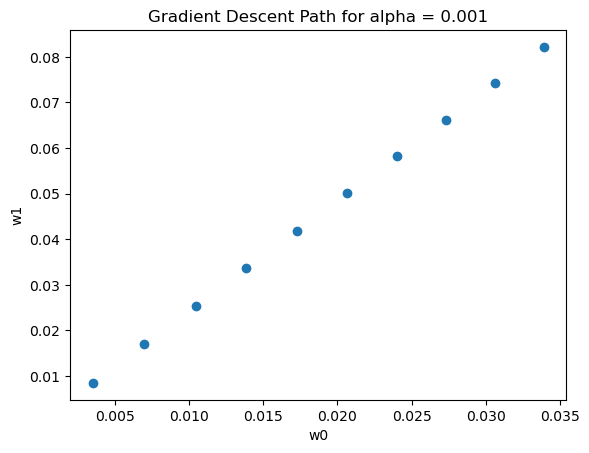

In [9]:
# * 2)
# Call the multiple_linear_reg_model_gda.

print("=========================================")

learning_rate = 0.001
results = multiple_linear_reg_model_gda(X_1, y_2d, N, learning_rate, num_iters)

w = results[0]

print(f"alpha = {learning_rate}")
print("w: ", w, "\ninitial cost: ", results[1], "\nfinal cost: ", results[2])

print("=========================================")

(2, 2)
(2, 1)
(2, 1)
Initial Cost
6.25
(2, 2)
(2, 1)
(2, 1)
On iteration 1, w0 and w1 are: [[0.105]
 [0.255]]


On iteration 2, w0 and w1 are: [[0.187725]
 [0.4524  ]]


On iteration 3, w0 and w1 are: [[0.25316325]
 [0.60510263]]


On iteration 4, w0 and w1 are: [[0.30518566]
 [0.72312037]]


On iteration 5, w0 and w1 are: [[0.34679606]
 [0.81422297]]


On iteration 6, w0 and w1 are: [[0.38032545]
 [0.88443979]]


On iteration 7, w0 and w1 are: [[0.40758271]
 [0.93844962]]


On iteration 8, w0 and w1 are: [[0.4299715 ]
 [0.97988324]]


On iteration 9, w0 and w1 are: [[0.44858111]
 [1.01155815]]


On iteration 10, w0 and w1 are: [[0.46425682]
 [1.03566072]]


(2, 2)
(2, 1)
(2, 1)
Final Cost
0.6177112481455014
alpha = 0.03
w:  [[0.46425682]
 [1.03566072]] 
initial cost:  6.25 
final cost:  0.6177112481455014


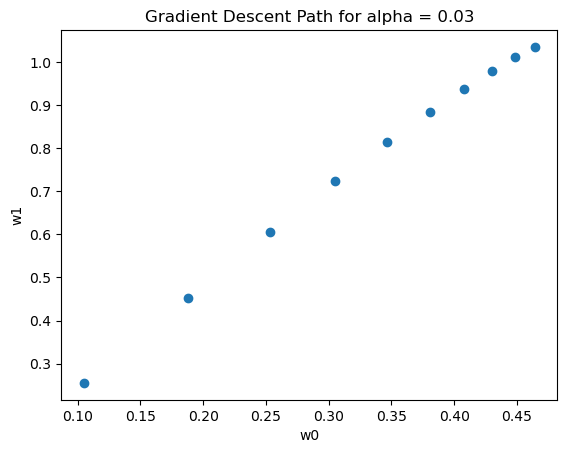

In [10]:
# * 3)
# Call the multiple_linear_reg_model_gda.

print("=========================================")

learning_rate = 0.03
results = multiple_linear_reg_model_gda(X_1, y_2d, N, learning_rate, num_iters)

w = results[0]

print(f"alpha = {learning_rate}")
print("w: ", w, "\ninitial cost: ", results[1], "\nfinal cost: ", results[2])

print("=========================================")